In [1]:
import numpy as np
import cv2 as cv
from torch.utils.data import DataLoader
import generate_training_validation_data
import matplotlib.pyplot as plt
import torch
import torch.optim as optim
import torch.nn as nn
from PIL import Image
import torchvision.transforms as transforms
from binary_segmentation_intro import PetModel

ckpt_PATH = r"C:\Users\maxan\Documents\Programming\MemeMachine\MemeMachine\TextPixelMasking\model_saves\binary_segmentation_intro\FPN\binary-segmentation_introPIL-FPN--efficientnet-b5-epoch=00-valid_dataset_iou=0.897234.ckpt"

model =  PetModel.load_from_checkpoint(ckpt_PATH, arch="FPN", encoder_name="efficientnet-b5", in_channels=3, out_classes=1,)
print("successfully loaded model checkpoint from", ckpt_PATH)
model.eval()

Train size: 31307
Valid size: 9017
successfully loaded model checkpoint from C:\Users\maxan\Documents\Programming\MemeMachine\MemeMachine\TextPixelMasking\model_saves\binary_segmentation_intro\FPN\binary-segmentation_introPIL-FPN--efficientnet-b5-epoch=00-valid_dataset_iou=0.908389.ckpt


PetModel(
  (model): FPN(
    (encoder): EfficientNetEncoder(
      (_conv_stem): Conv2dStaticSamePadding(
        3, 48, kernel_size=(3, 3), stride=(2, 2), bias=False
        (static_padding): ZeroPad2d(padding=(0, 1, 0, 1), value=0.0)
      )
      (_bn0): BatchNorm2d(48, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
      (_blocks): ModuleList(
        (0): MBConvBlock(
          (_depthwise_conv): Conv2dStaticSamePadding(
            48, 48, kernel_size=(3, 3), stride=[1, 1], groups=48, bias=False
            (static_padding): ZeroPad2d(padding=(1, 1, 1, 1), value=0.0)
          )
          (_bn1): BatchNorm2d(48, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
          (_se_reduce): Conv2dStaticSamePadding(
            48, 12, kernel_size=(1, 1), stride=(1, 1)
            (static_padding): Identity()
          )
          (_se_expand): Conv2dStaticSamePadding(
            12, 48, kernel_size=(1, 1), stride=(1, 1)

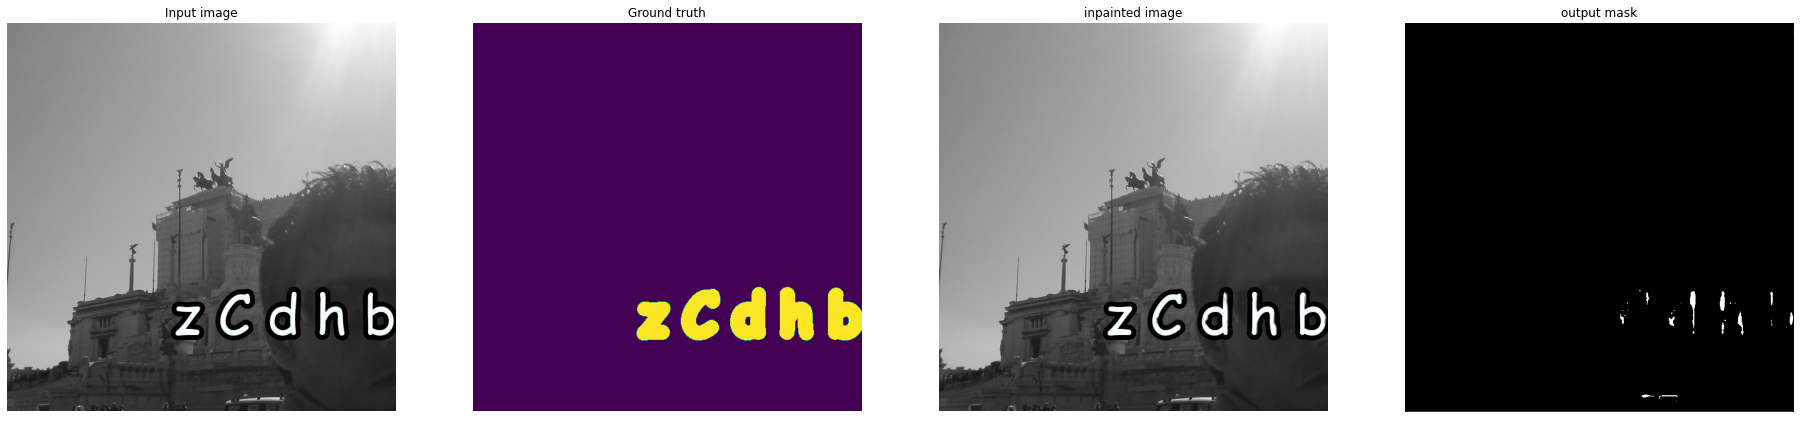

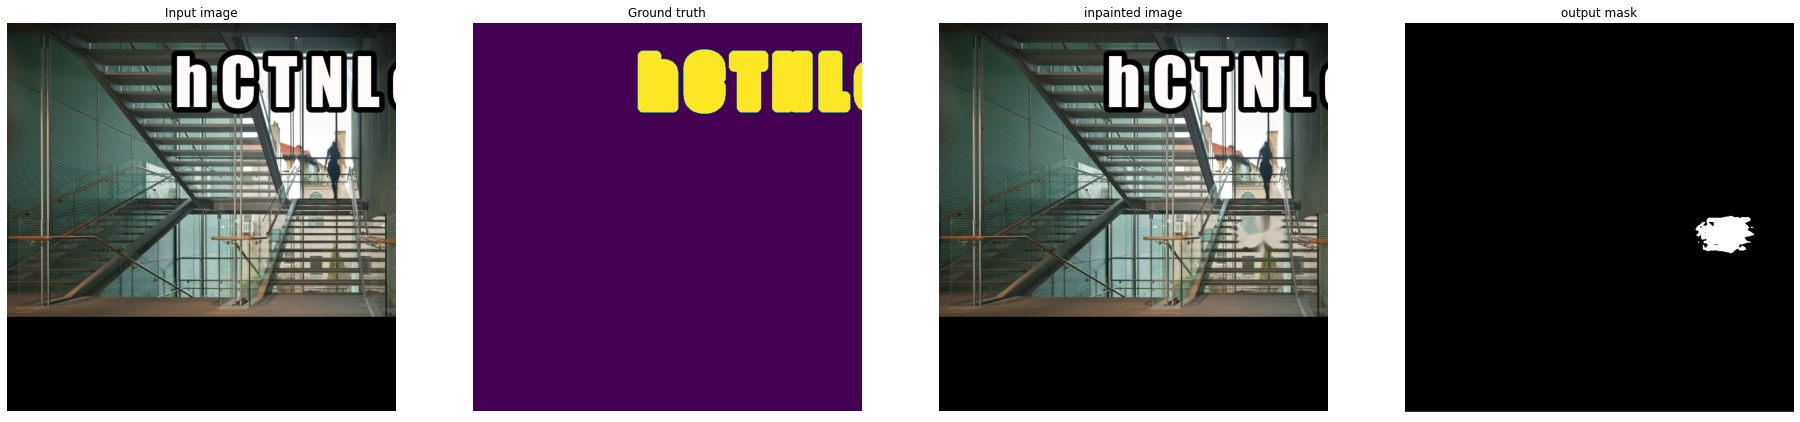

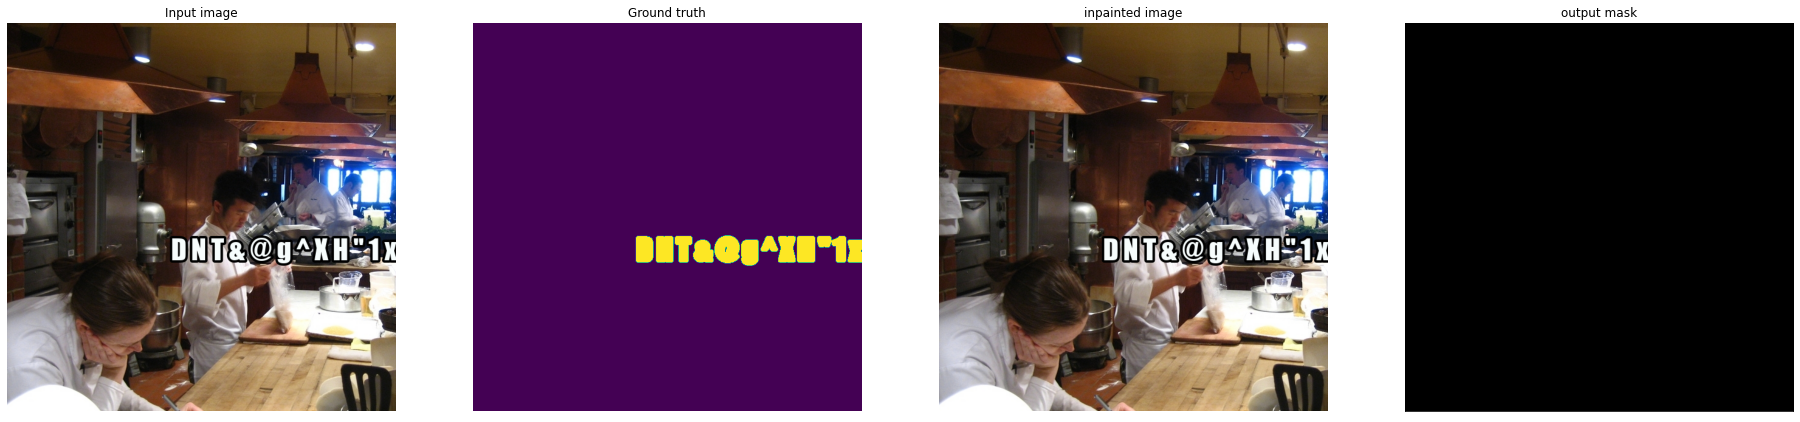

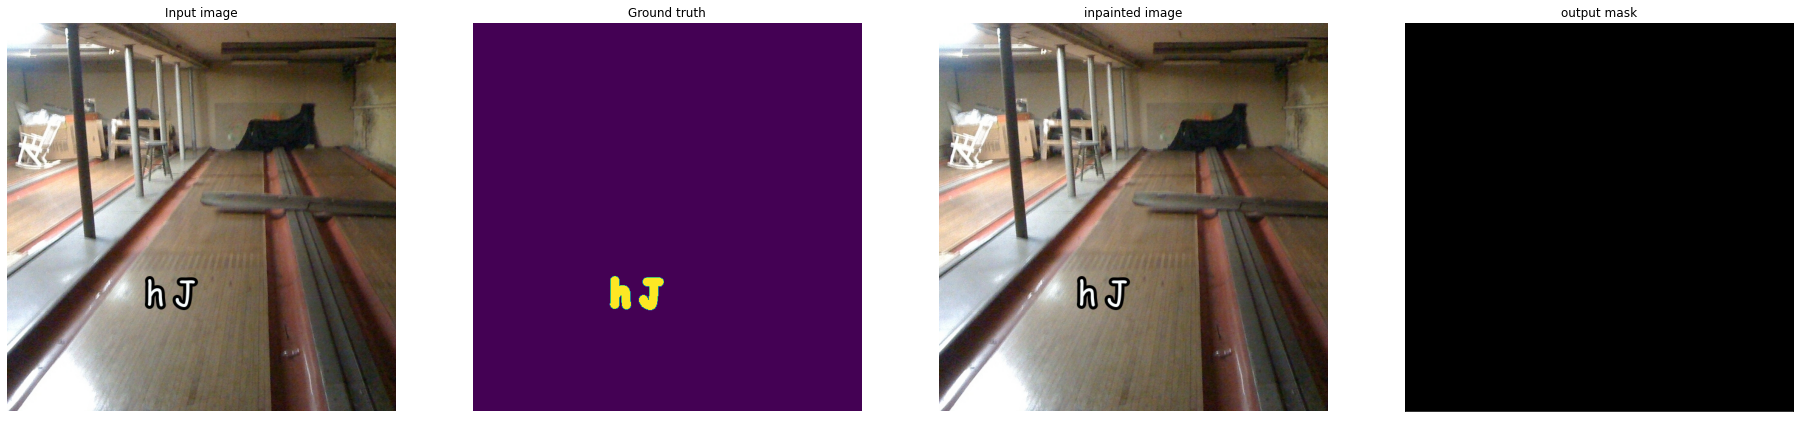

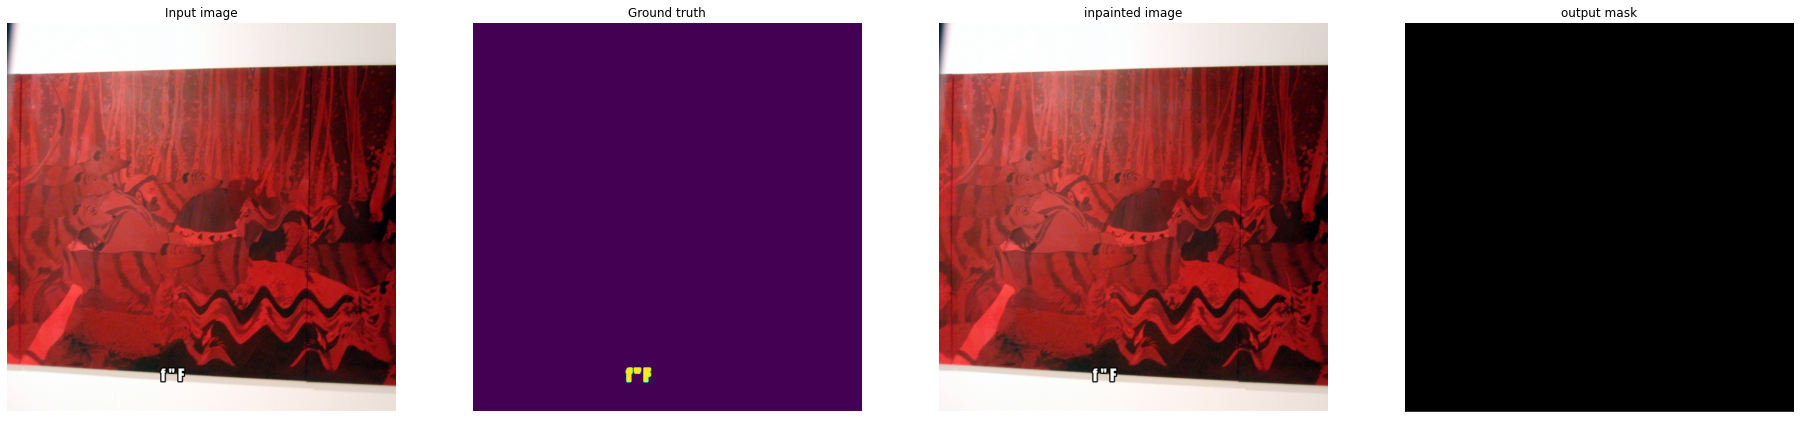

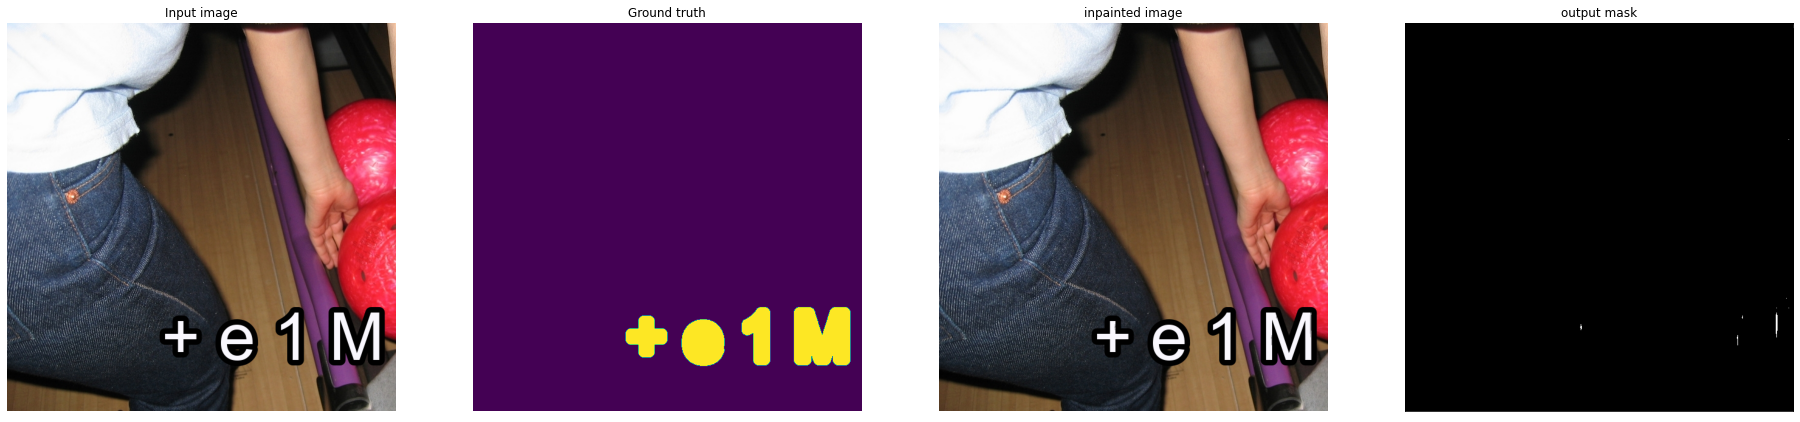

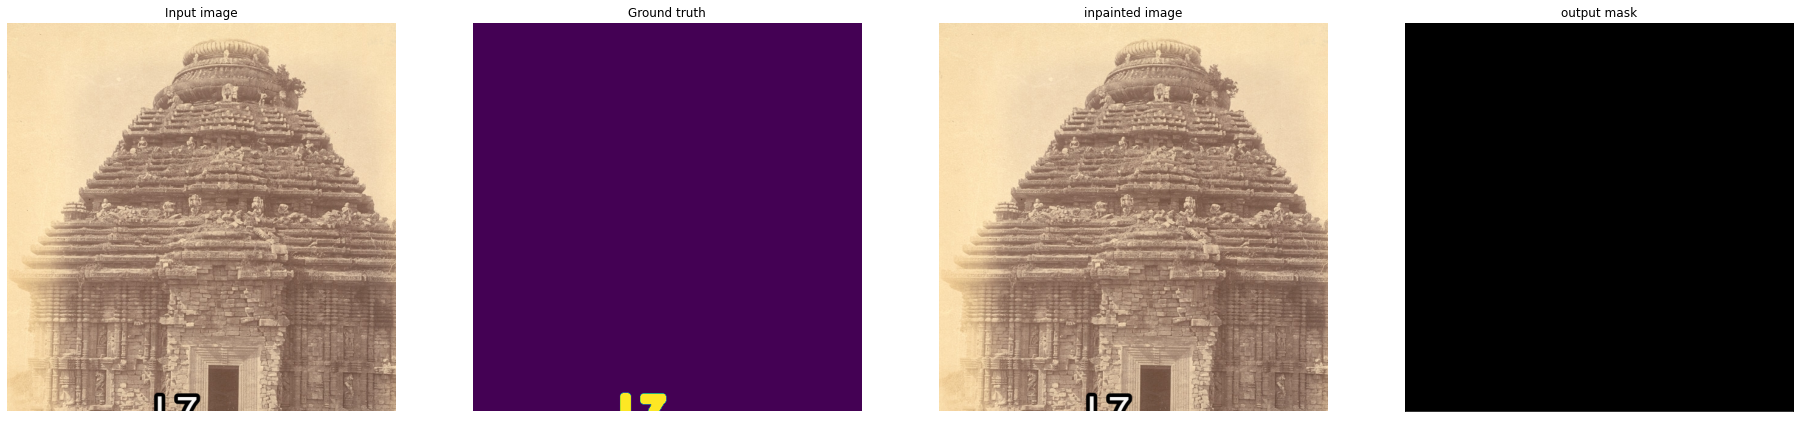

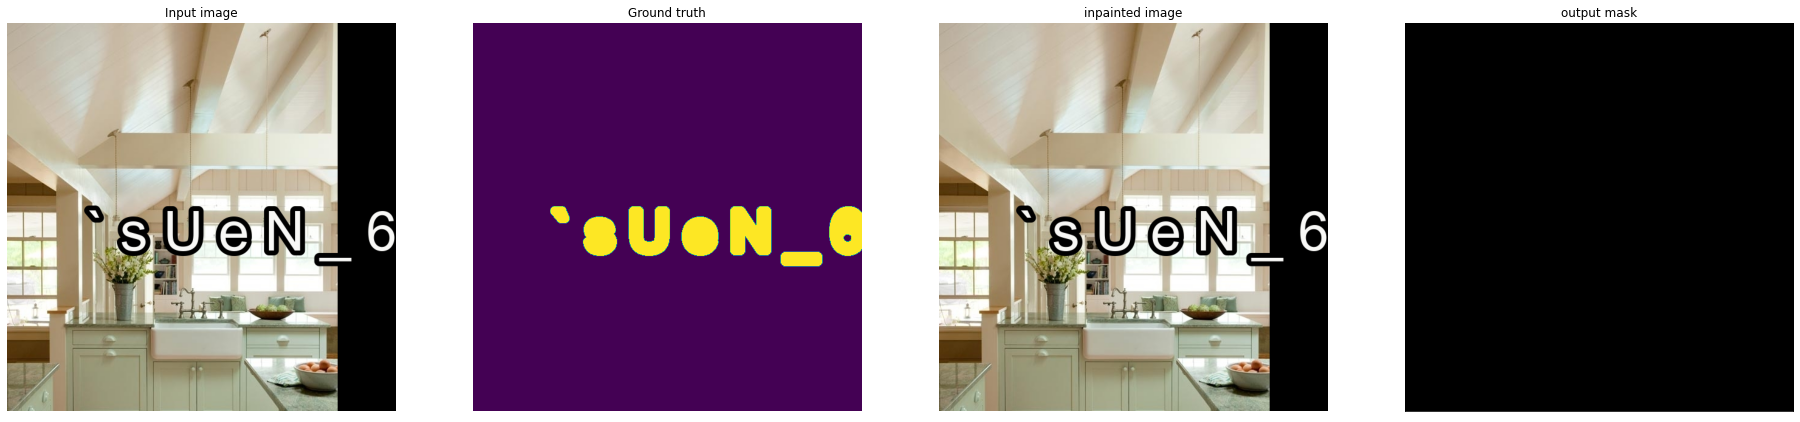

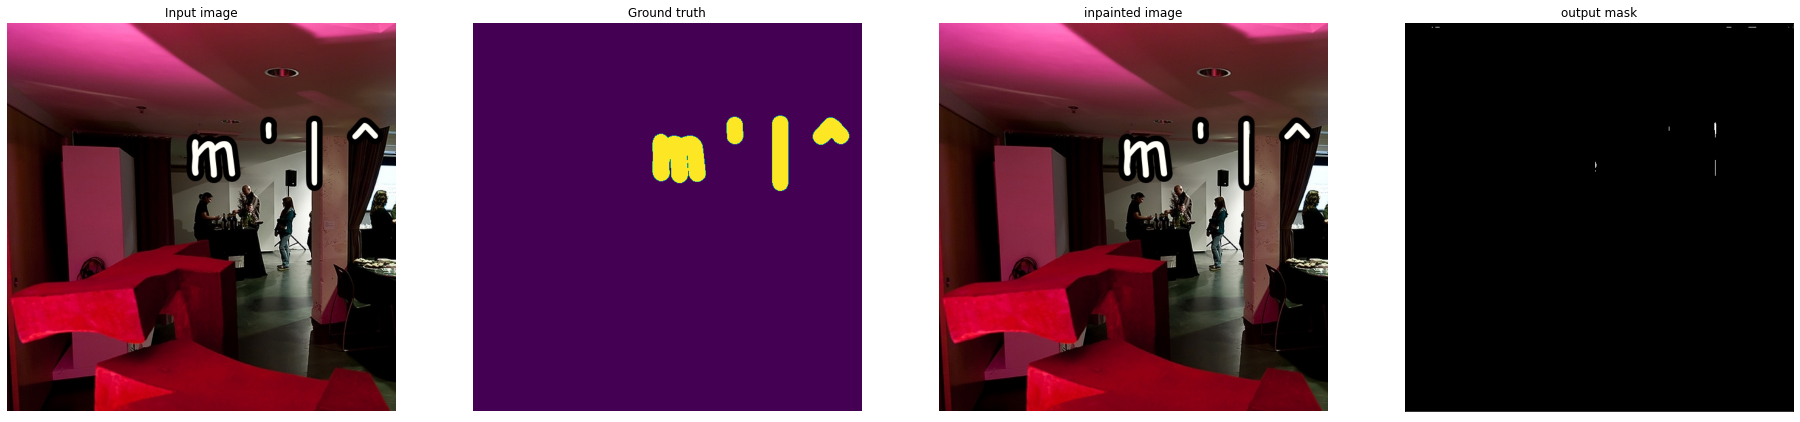

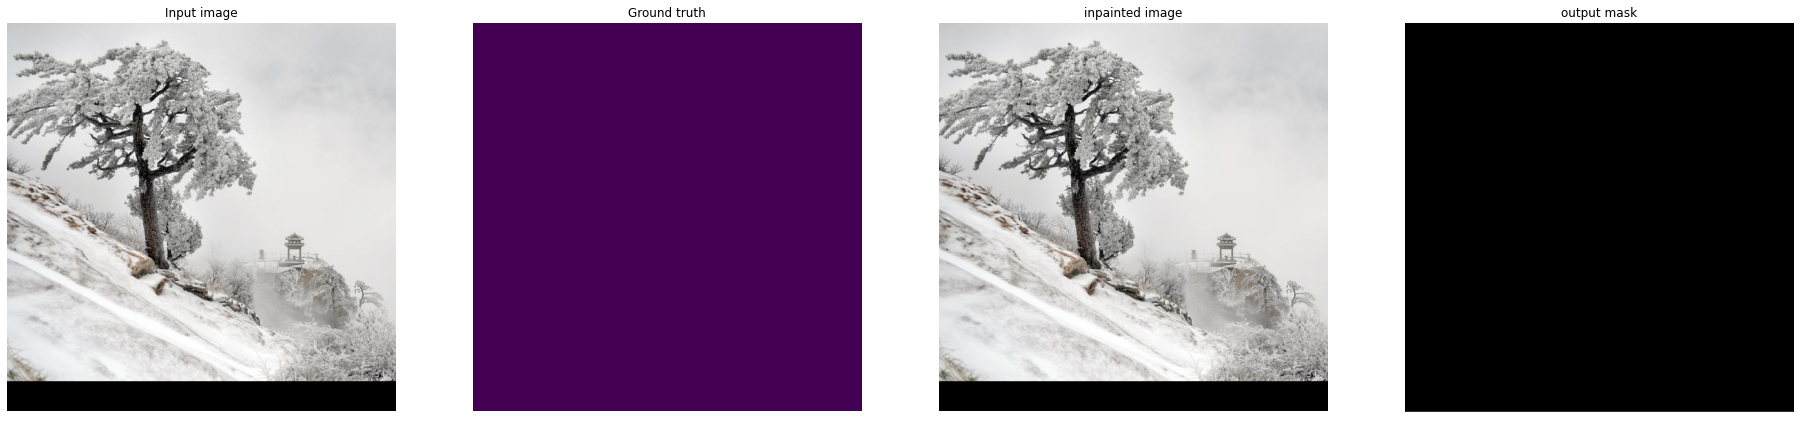

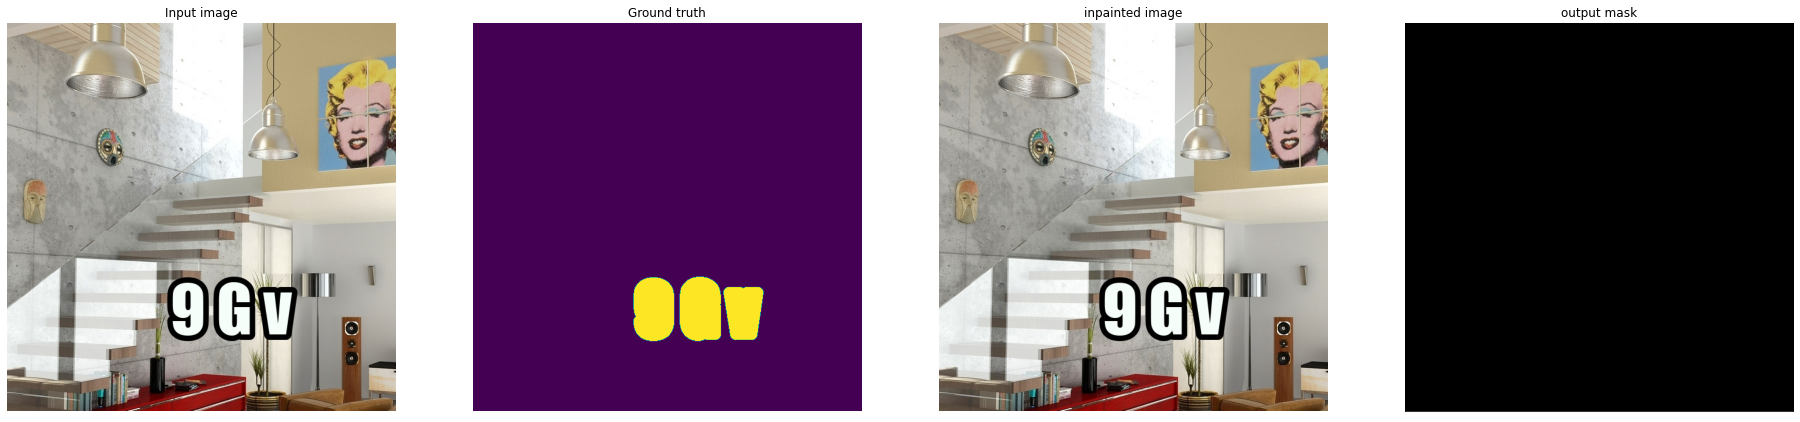

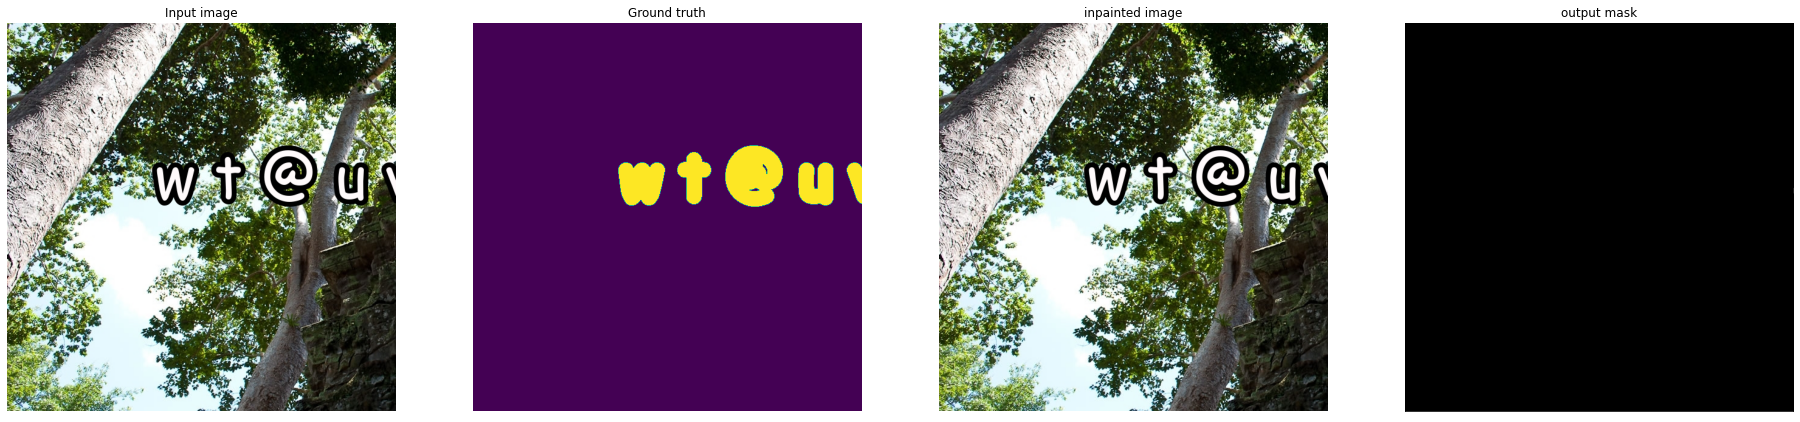

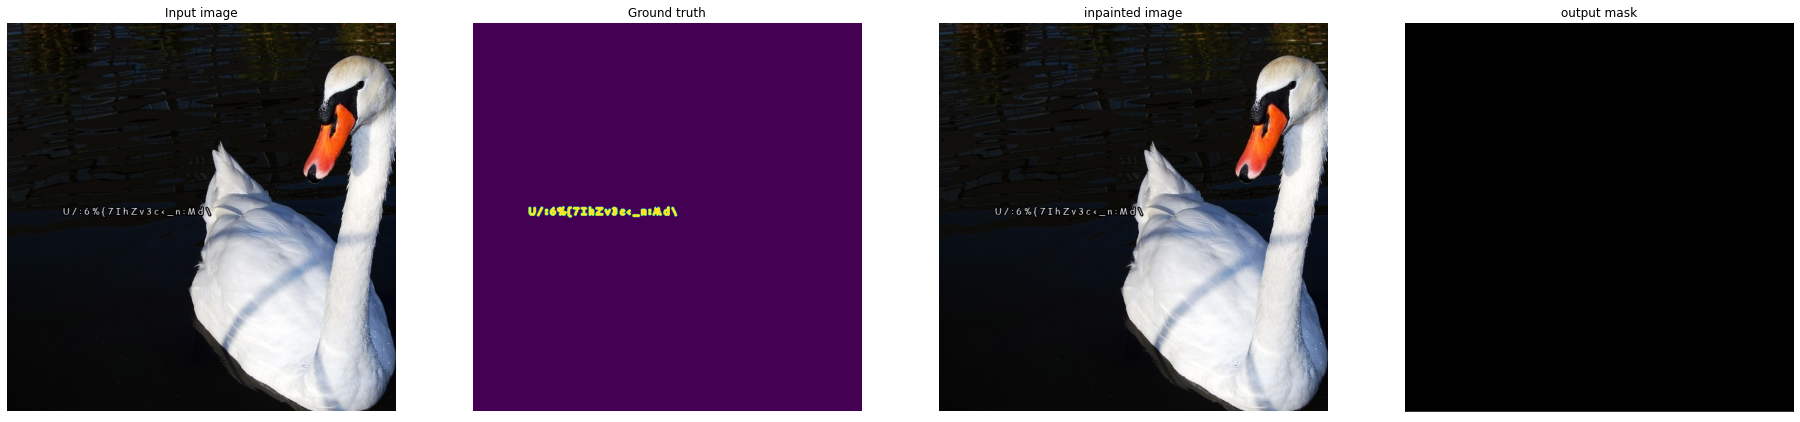

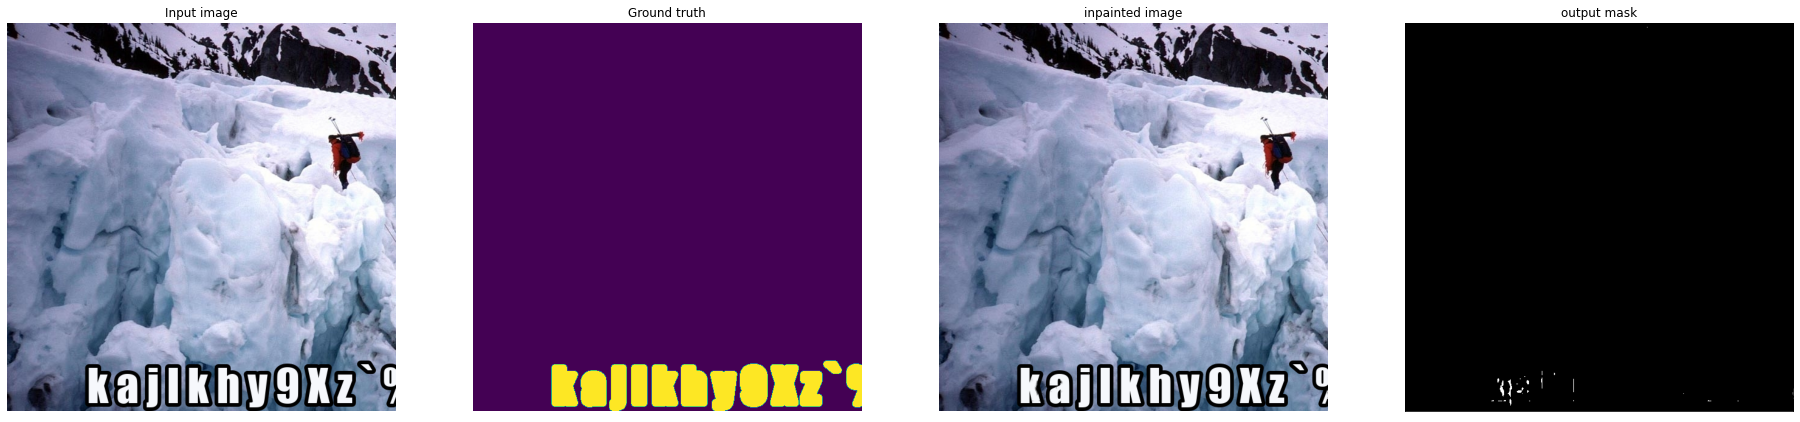

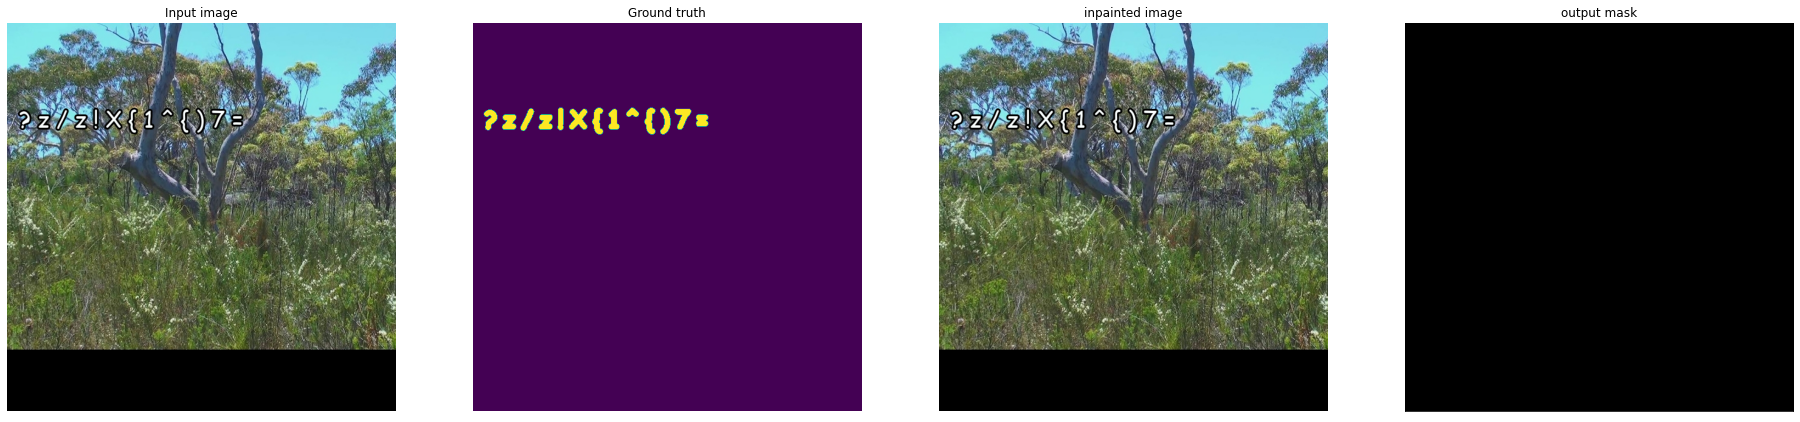

In [2]:

train_data_dir = 'D:/MemeMachine_ProjectData/dataset/training'
validation_data_dir = 'D:/MemeMachine_ProjectData/dataset/validation'
img_width, img_height, n_channels = 640, 640, 3 


train_dataset = generate_training_validation_data.PILImageDataset(train_data_dir, img_width, img_height)
test_dataset = generate_training_validation_data.PILImageDataset(validation_data_dir, img_width, img_height)

train_dataloader = DataLoader(train_dataset, batch_size=1, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=True)

for i in range (15):

    # Display image and label
    batch = next(iter(test_dataloader))
    with torch.no_grad():
        model.eval()
        logits = model(batch["image"])
    pr_masks = logits.sigmoid()

    for image, gt_mask, pr_mask in zip(batch["image"], batch["mask"], pr_masks):
        fig = plt.figure(figsize=(32, 16))
    
        fig.add_subplot(1, 4, 1, xticks=[], yticks=[])
        plt.title("Input image")
        input = (image.long().numpy().transpose(1, 2, 0)).astype(np.uint8)
        plt.imshow(input) # convert CHW -> HWC
        plt.axis("off")

        fig.add_subplot(1, 4, 2, xticks=[], yticks=[])
        plt.imshow(gt_mask.long().numpy().squeeze()) # just squeeze classes dim, because we have only one class
        plt.title("Ground truth")
        plt.axis("off")

        fig.add_subplot(1, 4, 3, xticks=[], yticks=[])
        output = pr_mask.numpy().squeeze() # just squeeze classes dim, because we have only one class
        output[output < 0.5] =0
        output[output > 0] = 1
        output = output.astype(np.uint8)

        inpainted_image = cv.inpaint(input,output,3,cv.INPAINT_TELEA)
        plt.imshow(inpainted_image, cmap="gray")
        plt.title("inpainted image")
        plt.axis("off")

        fig.add_subplot(1, 4, 4, xticks=[], yticks=[])
        plt.title("output mask")
        plt.imshow(pr_mask.numpy().squeeze(), cmap='gray')
        # plt.title("input image bit-wise PLUS output mask")
        # xor_image = input
        # xor_image[:,:,0] = np.squeeze(255*output) +  xor_image[:,:,0]
        # xor_image[:,:,1] = np.squeeze(255*output) +  xor_image[:,:,1]
        # xor_image[:,:,2] = np.squeeze(255*output) +  xor_image[:,:,2]
        # plt.imshow(xor_image, cmap='gray')

        plt.show()

    fig.savefig("cv2inpainting_telea/SMP0.96iou_ModelImage_"+str(i)+".jpg", dpi='figure')

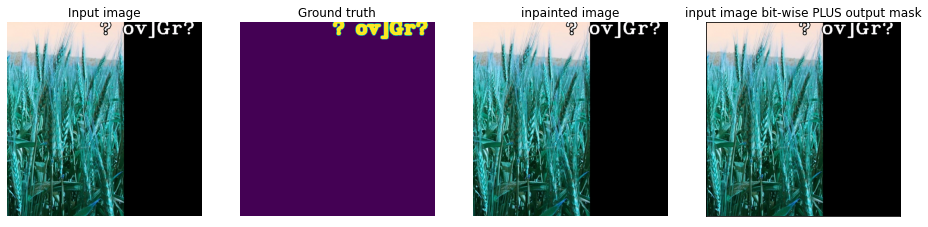

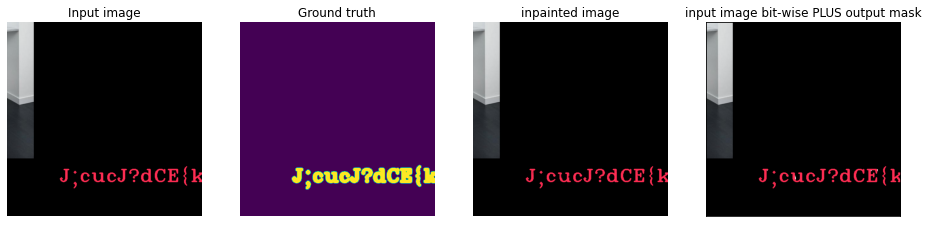

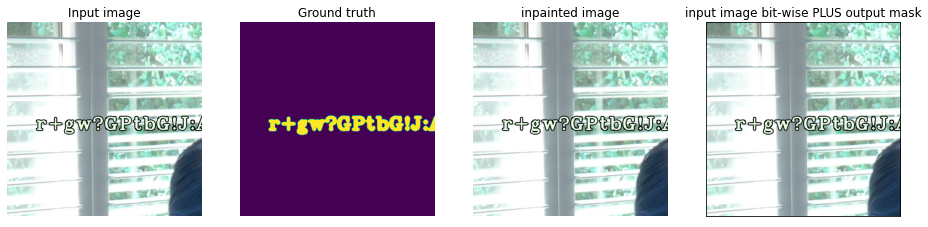

In [3]:
train_data_dir = 'D:/MemeMachine_ProjectData/dataset/training'
validation_data_dir = 'D:/MemeMachine_ProjectData/dataset/validation'
img_width, img_height, n_channels = 640, 640, 3 


train_dataset = generate_training_validation_data.CustomImageDataset(train_data_dir, img_width, img_height)
test_dataset = generate_training_validation_data.CustomImageDataset(validation_data_dir, img_width, img_height)

train_dataloader = DataLoader(train_dataset, batch_size=1, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=True)



for i in range (3):

    # Display image and label
    batch = next(iter(test_dataloader))
    with torch.no_grad():
        model.eval()
        logits = model(batch["image"])
    pr_masks = logits.sigmoid()

    for image, gt_mask, pr_mask in zip(batch["image"], batch["mask"], pr_masks):
        fig = plt.figure(figsize=(16, 8))
    
        fig.add_subplot(1, 4, 1, xticks=[], yticks=[])
        plt.title("Input image")
        input = (image.long().numpy().transpose(1, 2, 0)).astype(np.uint8)
        plt.imshow(input) # convert CHW -> HWC
        plt.axis("off")

        fig.add_subplot(1, 4, 2, xticks=[], yticks=[])
        plt.imshow(gt_mask.long().numpy().squeeze()) # just squeeze classes dim, because we have only one class
        plt.title("Ground truth")
        plt.axis("off")

        fig.add_subplot(1, 4, 3, xticks=[], yticks=[])
        output = pr_mask.numpy().squeeze() # just squeeze classes dim, because we have only one class
        output[output < 0.5] =0
        output[output > 0] = 1
        output = output.astype(np.uint8)

        inpainted_image = cv.inpaint(input,output,3,cv.INPAINT_TELEA)
        plt.imshow(inpainted_image, cmap="gray")
        plt.title("inpainted image")
        plt.axis("off")

        fig.add_subplot(1, 4, 4, xticks=[], yticks=[])
        plt.title("input image bit-wise PLUS output mask")
        xor_image = input
        xor_image[:,:,0] = np.squeeze(255*output) +  xor_image[:,:,0]
        xor_image[:,:,1] = np.squeeze(255*output) +  xor_image[:,:,1]
        xor_image[:,:,2] = np.squeeze(255*output) +  xor_image[:,:,2]
        plt.imshow(xor_image, cmap='gray')

        plt.show()

    fig.savefig("cv2inpainting_telea/SMP0.96iou_ModelImage_"+str(i)+".jpg", dpi='figure')

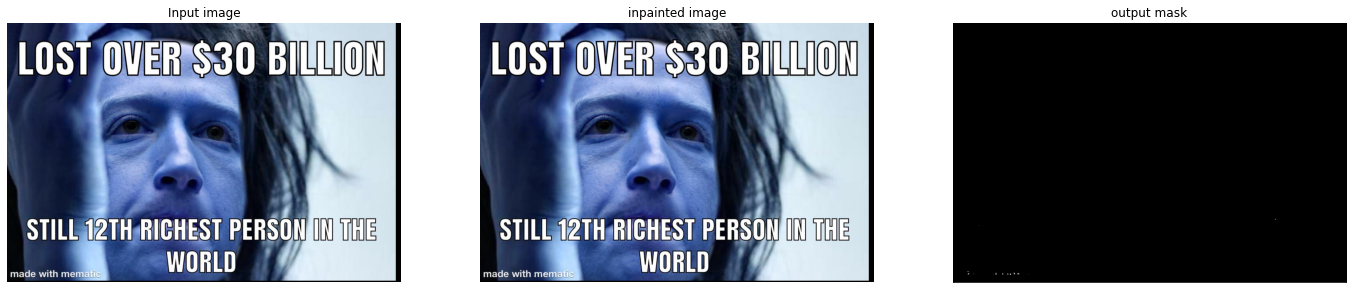

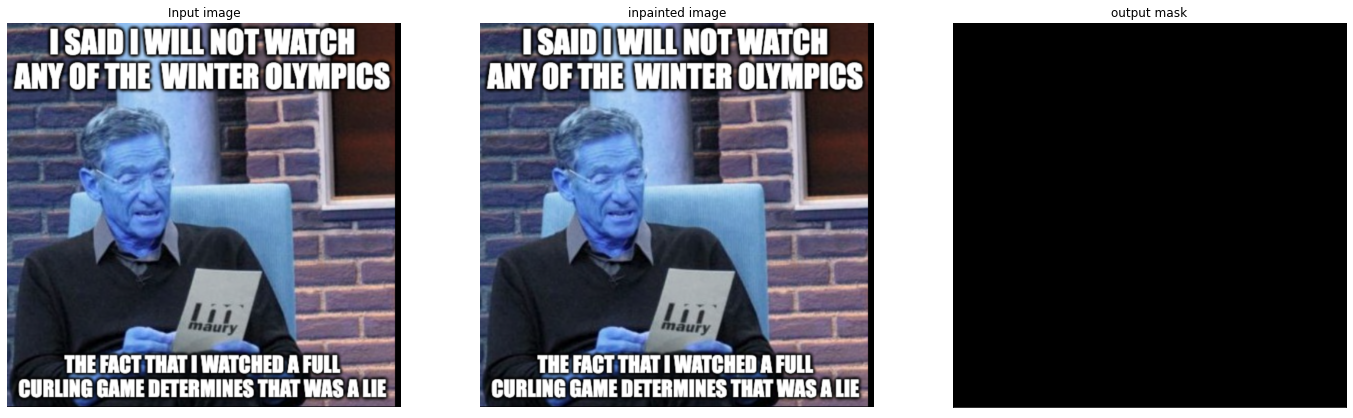

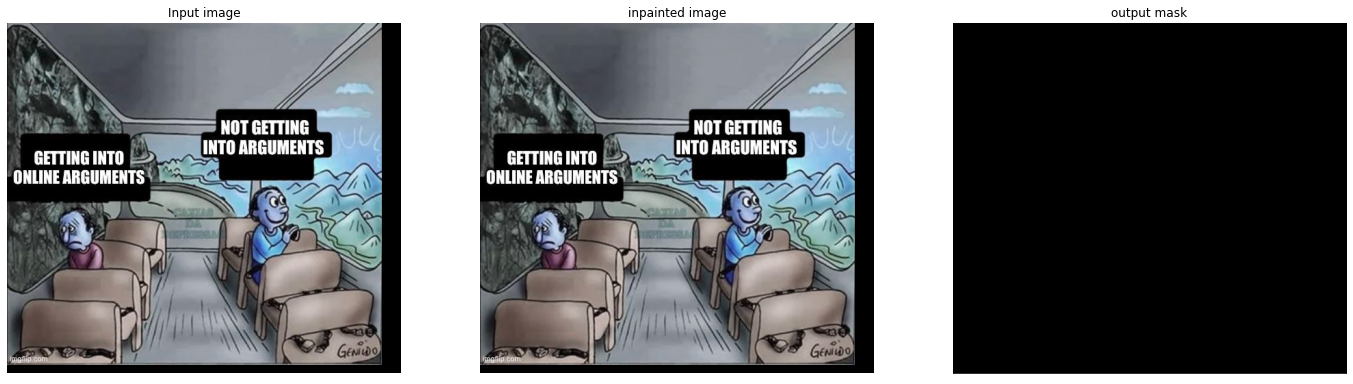

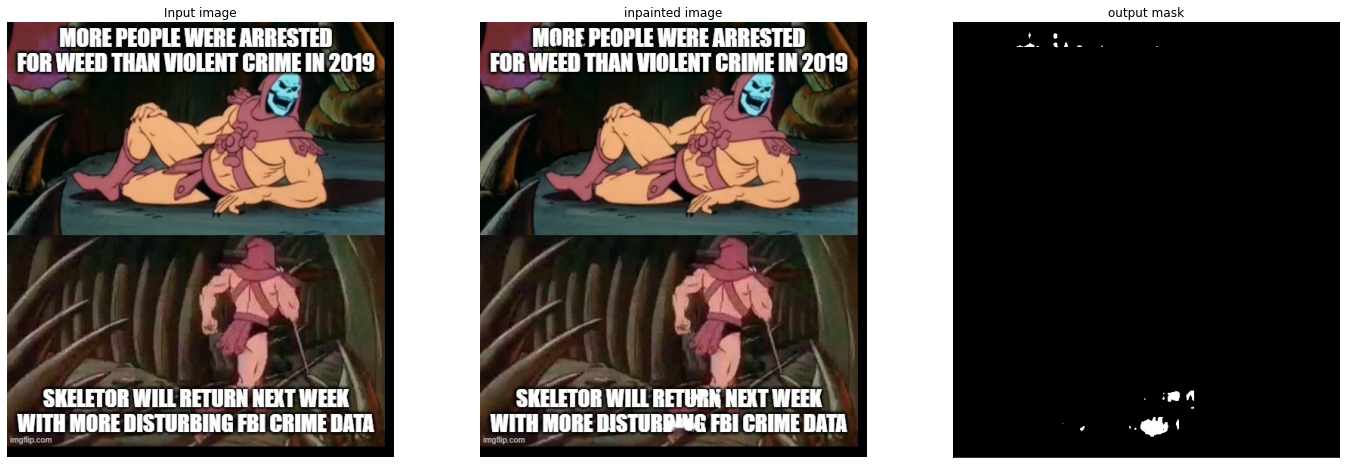

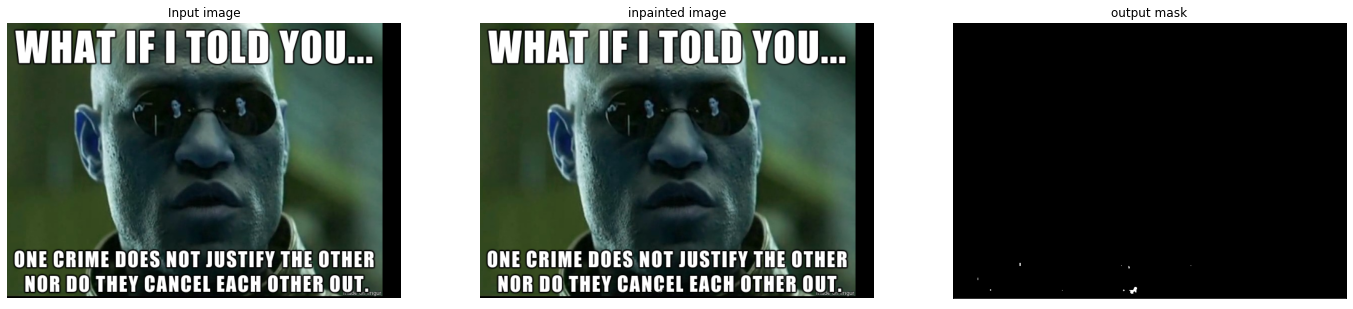

In [4]:

meme_data_dir = r"D:\MemeMachine_ProjectData\memesDataset"

test_dataset = generate_training_validation_data.MemeImageDataset(meme_data_dir)

test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=False)

data_loader_iter = iter(test_dataloader)

for i in range (5):

    # Display image and label
    batch = next(data_loader_iter)
    with torch.no_grad():
        model.eval()
        logits = model(batch)
    pr_masks = logits.sigmoid()

    for image, pr_mask in zip(batch, pr_masks):
        fig = plt.figure(figsize=(24, 8))
    
        fig.add_subplot(1, 3, 1, xticks=[], yticks=[])
        plt.title("Input image")
        input = (image.long().numpy().transpose(1, 2, 0)).astype(np.uint8)
        plt.imshow(input) # convert CHW -> HWC
        plt.axis("off")

        fig.add_subplot(1, 3, 2, xticks=[], yticks=[])
        output = pr_mask.numpy().squeeze() # just squeeze classes dim, because we have only one class
        output[output < 0.5] =0
        output[output > 0] = 1
        output = output.astype(np.uint8)

        inpainted_image = cv.inpaint(input,output,1,cv.INPAINT_TELEA)
        plt.imshow(inpainted_image, cmap="gray")
        plt.title("inpainted image")
        plt.axis("off")

        fig.add_subplot(1, 3, 3, xticks=[], yticks=[])
        plt.title("output mask")
        plt.imshow(pr_mask.numpy().squeeze(), cmap='gray')


        plt.show()

    fig.savefig("cv2inpainting_telea/SMP_Test_Meme_ModelImage_"+str(i)+".jpg", dpi='figure')